In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import gmaps
import os
import scipy.stats as st
from scipy.stats import linregress


# Save path to csv file in a variable
data_file="../Resources/AustraliaDataScienceJobs.csv"

# Read data file using pandas library
data_file_df=pd.read_csv(data_file,encoding="UTF-8")

# Display dataframe
df=pd.DataFrame(data_file_df)
df.head()

,Job Title,Job Location,Company,Url,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,95917,80000,115000,10000+ Employees,Company - Public,Finance,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,115631,94000,143000,10000+ Employees,Company - Public,Finance,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Remove unwanted columns
cols=['Url','Job Descriptions']
data_science=df.drop(cols,axis=1)
data_science

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,Helicopter Pilot,Subiaco,Rocketmine,80000,70000,90000,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2084,Graduate Environmental Specialist,Perth,Lynas Corporation,114923,94000,140000,501 to 1000 Employees,Company - Private,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2085,Graduate Environmental Specialist,Perth,Lynas Corporation,114923,94000,140000,501 to 1000 Employees,Company - Private,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2086,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Identify incomplete rows
data_science.count()

Job Title                        2085
Job Location                     2088
Company                          2088
Estimate Base Salary             2088
Low Estimate                     2088
High Estimate                    2088
Company Size                     1907
Company Type                     1907
Company Sector                   1521
Company Founded                  1198
Company Industry                 1521
Company Revenue                  1907
Company Rating                   1777
Company Friend Reccomendation    1732
Company CEO Approval             1324
Companny Number of Rater         1777
Company Career Opportinities     1770
Compensation and Benefits        1770
Company Culture and Values       1770
Company Senior Management        1770
Company Work Life Balance        1770
Country                          2088
State                            2088
python_yn                        2088
r_yn                             2088
sql_yn                           2088
java_yn     

In [4]:
# Drop rows with missing information and create a new dataframe
data_science_df=data_science.dropna(how='any')
data_science_df=pd.DataFrame(data_science_df)
data_science_df.head()

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Verify Cleanup
data_science_df.count()

Job Title                        1112
Job Location                     1112
Company                          1112
Estimate Base Salary             1112
Low Estimate                     1112
High Estimate                    1112
Company Size                     1112
Company Type                     1112
Company Sector                   1112
Company Founded                  1112
Company Industry                 1112
Company Revenue                  1112
Company Rating                   1112
Company Friend Reccomendation    1112
Company CEO Approval             1112
Companny Number of Rater         1112
Company Career Opportinities     1112
Compensation and Benefits        1112
Company Culture and Values       1112
Company Senior Management        1112
Company Work Life Balance        1112
Country                          1112
State                            1112
python_yn                        1112
r_yn                             1112
sql_yn                           1112
java_yn     

In [6]:
# Checking the number of rows and columns
data_science_df.shape

(1112, 51)

In [7]:
# Checking the datatypes of the columns
data_science_df.dtypes

Job Title                         object
Job Location                      object
Company                           object
Estimate Base Salary               int64
Low Estimate                       int64
High Estimate                      int64
Company Size                      object
Company Type                      object
Company Sector                    object
Company Founded                  float64
Company Industry                  object
Company Revenue                   object
Company Rating                   float64
Company Friend Reccomendation    float64
Company CEO Approval             float64
Companny Number of Rater         float64
Company Career Opportinities     float64
Compensation and Benefits        float64
Company Culture and Values       float64
Company Senior Management        float64
Company Work Life Balance        float64
Country                           object
State                             object
python_yn                          int64
r_yn            

In [8]:
# To find the non-number values(optional)
data_science_df.max()

Job Title                              Visualisation Specialist
Job Location                                         Wollongong
Company                                                      bp
Estimate Base Salary                                     295000
Low Estimate                                             241000
High Estimate                                            349000
Company Size                                            Unknown
Company Type                     Subsidiary or Business Segment
Company Sector                       Transportation & Logistics
Company Founded                                          2020.0
Company Industry                                      Wholesale
Company Revenue                        Unknown / Non-Applicable
Company Rating                                              4.9
Company Friend Reccomendation                             100.0
Company CEO Approval                                      100.0
Companny Number of Rater                

In [9]:
# Nishant
# 8: Find the states with the highest and lowest number of job opportunities by using groupby method
grouped_state_jobs = data_science_df.groupby(["State"])["Job Title"]
state_jobs=grouped_state_jobs.count()
state_jobs

State
New South Wales       385
Northern Territory      6
Queensland            150
South Australia        68
Tasmania               12
Victoria              377
Western Australia     114
Name: Job Title, dtype: int64

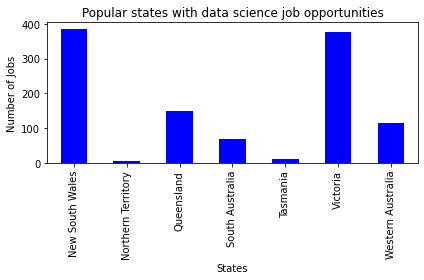

In [10]:
# # Nishant
# #Creating bar charts for data science job oppertunities by states
state_jobs.plot.bar(color='b')
plt.title("Popular states with data science job opportunities")
plt.xlabel("States")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.savefig("../images/states vs Number of jobs.png")

In [11]:
# Nishant
# 9: The popular company type and then make a pie chart
data_science_df['Company Type'] = data_science_df['Company Type'].replace(['Government'],'Company - Public')
private=data_science_df.loc[data_science_df['Company Type']=="Company - Private"]
public=data_science_df.loc[data_science_df['Company Type'] =="Company - Public"]
merged_company_type=pd.concat([private, public], ignore_index=True, sort=False)
company_df = merged_company_type.groupby(["Company Type"])["Company"]
company_type=company_df.count()
company_type

Company Type
Company - Private    425
Company - Public     544
Name: Company, dtype: int64

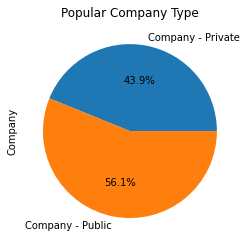

<Figure size 432x288 with 0 Axes>

In [12]:
# Nishant
# #Creating pie charts for data science job opportunities by popular company types
company_type.plot.pie(autopct= "%1.1f%%")
plt.title("Popular Company Type")
plt.show()
plt.tight_layout()
plt.savefig("../images/Job type vs job opportunities.png")

In [13]:
# Nishant
#remove string from column
data_science_df['Company Size Int'] = data_science_df['Company Size'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [14]:
# Nishant
# 10: Compare the size of the company using the bin and compare the salaries
#creating bins for size of companies
bins = [0, 1000, 5000, 11000000000]
#creating labels
group_size = ["Smaller", "Medium", "MNC"]

In [15]:
# Nishant
data_science_df["Size Of Company"] = pd.cut(data_science_df["Company Size Int"], bins, labels=group_size, include_lowest=True)
data_science_df

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn,Company Size Int,Size Of Company
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,1,0,10000.0,MNC
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,Data Scientist,Perth,GHD,97279,92000,103000,5001 to 10000 Employees,Company - Private,Management & Consulting,1928.0,...,0,0,1,0,0,0,0,0,500110000.0,MNC
2078,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
2079,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
2086,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,0,0,10000.0,MNC


In [16]:
# Nishant
# 10: compare the salaries using the bin 
#creating bins for salary slot
bins = [0, 60000, 130000, 250000]
#creating labels
group_salary = ["Lower", "Median", "Highest"]

In [17]:
# Nishant
data_science_df["Estimated Salary"] = pd.cut(data_science_df["Estimate Base Salary"], bins, labels=group_salary, include_lowest=True)
data_science_df

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn,Company Size Int,Size Of Company,Estimated Salary
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,1,0,10000.0,MNC,Median
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,10000.0,MNC,Median
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,10000.0,MNC,Median
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,10000.0,MNC,Median
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,10000.0,MNC,Median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,Data Scientist,Perth,GHD,97279,92000,103000,5001 to 10000 Employees,Company - Private,Management & Consulting,1928.0,...,0,1,0,0,0,0,0,500110000.0,MNC,Median
2078,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,10000.0,MNC,Highest
2079,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,10000.0,MNC,Highest
2086,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,0,10000.0,MNC,Highest


In [18]:
#Nishant use groupby for company type and estimate base salary and find mean estimate base salary for company types
overall_type_salary = data_science_df.groupby(["Company Type"]).mean()["Estimate Base Salary"]
overall_type_salary

round(overall_type_salary,2)


Company Type
College / University              100477.78
Company - Private                 110646.48
Company - Public                  100010.80
Hospital                           62590.74
Non-profit Organisation            86419.00
Subsidiary or Business Segment     92891.40
Name: Estimate Base Salary, dtype: float64

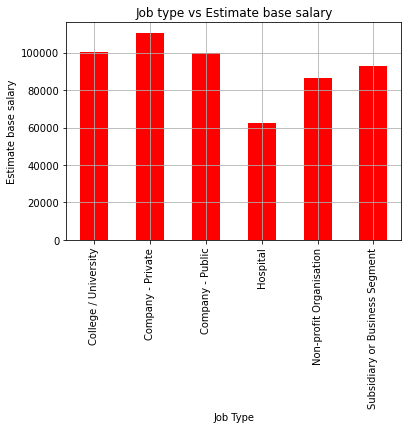

<Figure size 432x288 with 0 Axes>

In [19]:
#create bar graph company type vs Estimate base salary
overall_type_salary.plot.bar(color='r', grid = "true")
plt.title("Job type vs Estimate base salary")
plt.xlabel("Job Type")
plt.ylabel("Estimate base salary")
plt.show()
plt.tight_layout()
plt.savefig("../images/Job type vs Estimate Base Salary.png")
